In [121]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [122]:
import nltk
# Launch the installer to download "gutenberg" and "stop words" corpora.
# nltk.download()

# Pick 10 Literatures from 10 Authors

In [123]:
# Import the data we just downloaded and installed.
from nltk.corpus import gutenberg, stopwords

persuasion = gutenberg.raw('austen-persuasion.txt')
alice = gutenberg.raw('carroll-alice.txt')
ball = gutenberg.raw('chesterton-ball.txt')
stories = gutenberg.raw('bryant-stories.txt')
parents = gutenberg.raw('edgeworth-parents.txt')
moby_dick = gutenberg.raw('melville-moby_dick.txt')
paradise = gutenberg.raw('milton-paradise.txt')
ceasar = gutenberg.raw('shakespeare-caesar.txt')
leaves = gutenberg.raw('whitman-leaves.txt')
busterbrown = gutenberg.raw('burgess-busterbrown.txt')

# Data Cleaning

In [124]:
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub(r'Ä',' ',text) 
    text = re.sub(r'Ú',' ',text)
    text = re.sub(r'¿',' ',text)
    text = re.sub(r'³',' ',text)
    text = re.sub(r'==',' ',text)
    text = re.sub(r'-=',' ', text)
    text = re.sub(r'~~',' ',text)
    text = re.sub(r'&&',' ',text)
    text = re.sub(r'íí',' ',text)
    text = re.sub(r'\\X00',' ',text)
    text = re.sub(r'x00',' ',text)
    text = re.sub(r'ßß',' ',text)
    text = re.sub(r'','',text)
    text = re.sub(r'À',' ',text)
    text = re.sub(r'Ù',' ',text)
    text = re.sub(r"\(",' ',text)
    text = re.sub(r"\)",' ',text)
    text = re.sub(r'\"',' ',text)
    text = re.sub(r"\'",' ',text)
    text = re.sub(r'\;',' ',text)
    text = re.sub(r'\r',' ',text)
    text = re.sub(r'  ',' ',text)
    text = re.sub(r'\d+', '',text)
    text = text.lower()
    return text

In [125]:
persuasion = text_cleaner(persuasion)
alice = text_cleaner(alice)
ball = text_cleaner(ball)
stories = text_cleaner(stories)
parents = text_cleaner(parents)
moby_dick = text_cleaner(moby_dick)
paradise = text_cleaner(paradise)
ceasar = text_cleaner(ceasar)
leaves = text_cleaner(leaves)
busterbrown = text_cleaner(busterbrown)

In [126]:
# Now we'll match and remove chapter headings.
persuasion = re.sub(r'chapter \d', '', persuasion)
alice = re.sub(r'chapter \d', '', alice)
ball = re.sub(r'chapter \d', '', ball)
stories = re.sub(r'chapter \d', '', stories)
parents = re.sub(r'chapter \d', '', parents)
moby_dick = re.sub(r'chapter \d', '', moby_dick)
paradise = re.sub(r'chapter \d', '', paradise)
ceasar = re.sub(r'chapter \d', '', ceasar)
leaves = re.sub(r'chapter \d', '', leaves)
busterbrown = re.sub(r'chapter \d', '', busterbrown)

In [127]:
# Remove Chapter Heading
persuasion = re.sub(r'chapter .', '', persuasion)
alice = re.sub(r'chapter .', '', alice)
ball = re.sub(r'chapter .', '', ball)
stories = re.sub(r'chapter .', '', stories)
parents = re.sub(r'chapter .', '', parents)
moby_dick = re.sub(r'chapter .', '', moby_dick)
paradise = re.sub(r'chapter .', '', paradise)
ceasar = re.sub(r'chapter .', '', ceasar)
leaves = re.sub(r'chapter .', '', leaves)
busterbrown = re.sub(r'chapter .', '', busterbrown)

In [128]:
persuasion = persuasion.replace('\n','')
alice = alice.replace('\n','')
ball = ball.replace('\n','')
stories = stories.replace('\n','')
parents = parents.replace('\n','')
moby_dick = moby_dick.replace('\n','')
paradise = paradise.replace('\n','')
ceasar = ceasar.replace('\n','')
leaves = leaves.replace('\n','')
busterbrown = busterbrown.replace('\n','')

persuasion = persuasion.replace('\r\n','').split('.')
alice = alice.replace('\r\n','').split('.')
ball = ball.replace('\r\n','').split('.')
stories = stories.replace('\r\n','').split('.')
parents = parents.replace('\r\n','').split('.')
moby_dick = moby_dick.replace('\r\n','').split('.')
paradise = paradise.replace('\r\n','').split('.')
ceasar = ceasar.replace('\r\n','').split('.')
leaves = leaves.replace('\r\n','').split('.')
busterbrown = busterbrown.replace('\r\n','').split('.')

In [129]:
import string
persuasion = [strPiece.translate(str.maketrans('', '', string.punctuation)) for strPiece in persuasion]
alice = [strPiece.translate(str.maketrans('', '', string.punctuation)) for strPiece in alice]
ball = [strPiece.translate(str.maketrans('', '', string.punctuation)) for strPiece in ball]
stories = [strPiece.translate(str.maketrans('', '', string.punctuation)) for strPiece in stories]
parents = [strPiece.translate(str.maketrans('', '', string.punctuation)) for strPiece in parents]
moby_dick = [strPiece.translate(str.maketrans('', '', string.punctuation)) for strPiece in moby_dick]
paradise = [strPiece.translate(str.maketrans('', '', string.punctuation)) for strPiece in paradise]
ceasar = [strPiece.translate(str.maketrans('', '', string.punctuation)) for strPiece in ceasar]
leaves = [strPiece.translate(str.maketrans('', '', string.punctuation)) for strPiece in leaves]
busterbrown = [strPiece.translate(str.maketrans('', '', string.punctuation)) for strPiece in busterbrown]

In [130]:
persuasion = [piece.strip() for piece in persuasion ]
alice = [piece.strip() for piece in alice ]
ball = [piece.strip() for piece in ball ]
stories = [piece.strip() for piece in stories ]
parents = [piece.strip() for piece in parents ]
moby_dick = [piece.strip() for piece in moby_dick ]
paradise = [piece.strip() for piece in paradise ]
ceasar = [piece.strip() for piece in ceasar ]
leaves = [piece.strip() for piece in leaves ]
busterbrown = [piece.strip() for piece in busterbrown ]

In [131]:
def fillterHundred(stringList) :
    newList = []
    for piece in stringList :
        if len(piece) > 150:
            newList.append(piece)
    return newList

In [132]:
persuasion = fillterHundred(persuasion)
alice = fillterHundred(alice)
ball = fillterHundred(ball)
stories = fillterHundred(stories)
parents = fillterHundred(parents)
moby_dick = fillterHundred(moby_dick)
paradise = fillterHundred(paradise)
ceasar = fillterHundred(ceasar)
leaves = fillterHundred(leaves)
busterbrown = fillterHundred(busterbrown)

# Select 100 sample corpus from 10 literatures

In [133]:
import random
persuasion = random.sample(persuasion, 100)
alice = random.sample(alice, 100)
ball = random.sample(ball, 100)
stories = random.sample(stories, 100)
parents = random.sample(parents, 100)
moby_dick = random.sample(moby_dick, 100)
paradise = random.sample(paradise, 100)
ceasar = random.sample(ceasar, 100)
leaves = random.sample(leaves, 100)
busterbrown = random.sample(busterbrown, 100)

# Make a Dataframe

### Author Literature Pair
* austen, persuasion
* carroll, alice
* chesterton, ball
* bryant, stories
* edgeworth, parents
* melville, moby_dick
* milton, paradise
* shakespeare, caesar
* whitman, leaves
* burgess, busterbrown


In [134]:
df = pd.DataFrame(columns=['text','author'])

In [135]:
for piece in persuasion: 
    df = df.append({'text': piece,'author' : 0}, ignore_index=True)

for piece in alice: 
    df = df.append({'text': piece,'author' : 1}, ignore_index=True)

for piece in ball: 
    df = df.append({'text': piece,'author' : 2}, ignore_index=True)
    
for piece in stories: 
    df = df.append({'text': piece,'author' : 3}, ignore_index=True)

for piece in parents: 
    df = df.append({'text': piece,'author' : 4}, ignore_index=True)

for piece in moby_dick: 
    df = df.append({'text': piece,'author' : 5}, ignore_index=True)

for piece in paradise: 
    df = df.append({'text': piece,'author' : 6}, ignore_index=True)
    
for piece in ceasar: 
    df = df.append({'text': piece,'author' : 7}, ignore_index=True)

for piece in leaves: 
    df = df.append({'text': piece,'author' : 8}, ignore_index=True)
    
for piece in busterbrown: 
    df = df.append({'text': piece,'author' : 9}, ignore_index=True)

In [136]:
df.head()

,text,author
0,how eloquent could anne elliot have been how e...,0
1,chapter on the morning appointed for admiral a...,0
2,he certainly knew what was right nor could she...,0
3,i could never doubt that you would be loved an...,0
4,she was always on friendly termswith her broth...,0


# Converting sentences to vectors (TfidfVectorizer)

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(df['text'], test_size=0.25, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [138]:
#Applying the vectorizer
text_paras_tfidf=vectorizer.fit_transform(df['text'])
print("Number of features: %d" % text_paras_tfidf.get_shape()[1])

Number of features: 2917


In [139]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(200)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(text_paras_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

Percent variance captured by all components: 44.946484412454026


In [140]:
paras_by_component=pd.DataFrame(X_train_lsa)
paras_by_component['author'] = df['author']

In [144]:
X = paras_by_component.drop('author', axis = 1)
Y = paras_by_component['author']

In [148]:
X

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.064271,-0.014152,-0.004794,-0.009358,-0.036280,-0.083959,0.075019,-0.130757,-0.010453,-0.025745,...,-0.055324,0.004331,0.108972,-0.022191,-0.027999,0.112376,0.068052,-0.102697,0.045169,0.034914
1,0.102143,-0.029491,-0.025379,-0.004709,-0.024469,-0.061011,0.086690,-0.101708,-0.003862,0.039761,...,0.043258,-0.096502,-0.032708,0.038728,0.011332,0.023545,0.033713,0.000278,-0.038746,-0.040292
2,0.095054,0.009031,-0.002156,0.020008,-0.050726,0.038292,-0.037603,-0.048924,0.007750,0.063623,...,0.074838,0.017772,-0.027924,-0.031929,0.006739,-0.053601,-0.035966,0.010009,-0.009443,-0.091971
3,0.056529,-0.014755,-0.004477,0.003026,-0.032982,-0.031249,-0.006393,-0.058747,0.002962,-0.000143,...,-0.037333,0.019597,-0.000361,0.002845,0.011085,0.012587,-0.066225,-0.029122,0.000981,0.012822
4,0.092688,-0.033711,0.000980,-0.003528,-0.047788,-0.052200,0.013908,-0.004491,-0.036710,0.008596,...,-0.008198,-0.040487,0.036640,0.021431,-0.021259,-0.016037,-0.022943,-0.037049,-0.030765,0.134220
5,0.129095,-0.041298,-0.065418,-0.025832,-0.065545,-0.138919,0.052890,-0.096919,0.123013,0.007152,...,-0.018829,-0.031440,0.002674,-0.009540,0.139250,-0.041413,0.046323,0.048137,-0.017083,-0.018457
6,0.110250,-0.056887,-0.069421,0.035134,-0.084552,0.041639,0.097112,-0.125389,0.095966,0.068390,...,-0.015812,-0.018534,0.024582,-0.106907,-0.040351,-0.067217,0.113424,0.061862,-0.036077,-0.044404
7,0.077944,-0.042068,-0.024210,-0.011013,-0.078687,-0.051462,0.037930,-0.129483,0.030588,-0.006157,...,0.009377,-0.018202,0.063613,0.067760,-0.081853,-0.025762,-0.012607,0.045451,-0.054761,-0.074832
8,0.063642,-0.007785,-0.043461,0.000851,0.021100,-0.019385,0.073823,-0.115814,0.009361,-0.011047,...,0.040990,0.005066,0.119355,0.041377,0.031727,-0.081412,0.023853,0.046294,-0.084852,0.081023
9,0.157829,-0.035482,-0.070681,-0.049593,0.055474,-0.097722,0.068929,-0.141492,0.050455,0.090901,...,0.040747,-0.052620,-0.080632,0.031289,-0.012312,0.044562,-0.022112,-0.059822,-0.005515,0.072393


# Reserve 25% of your corpus as a test set

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

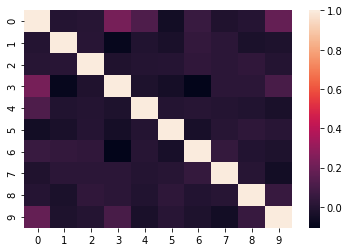

In [150]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train) * np.asmatrix(X_train).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
# print('Key:')
# for i in range(10):
#     print(i,sim_matrix.index[i])
